Make sure that the parent directory is on our python path

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

## Data Manipulation

Import methods

In [2]:
from Data.data_processing import load_data, to_daily_uni_multi, missing_values, data_normalization

Manipulate data

In [3]:
path = '../Data/Traffic_Incidents_Braga.csv'
method = 'univariate'

cv_splits = 3  # time series cross validator

df_raw = load_data(path)                    # load dataset
df_uni = to_daily_uni_multi(method, df_raw) # convert data to univariate and group incidents by day
df_uni = missing_values(df_uni)             # deal with missing values

scaler = data_normalization(method, df_uni) # scaling data to [-1, 1]

## Parameter Optimization

Import methods

In [4]:
from models import generate_configs, grid_search

Define parameter ranges to generate different configurations to evaluate the models 

In [5]:
features = 1 # univariate

timesteps = [5, 7]
epochs = [10, 20]
batch_size = [5, 7]
filters = [16]
kernel_size = [5]
pool_size = [2]

Generate a list with all the possible configurations

In [6]:
configs = generate_configs(timesteps, epochs, batch_size, filters, kernel_size, pool_size)

Generated 8 different configurations


Grid search for the best configuration (sorted by performance)

Epoch 1/10
39/39 [==============================] - 0s 5ms/step - loss: 0.3553 - mae: 0.3298 - rmse: 0.3544 - val_loss: 0.2692 - val_mae: 0.2337 - val_rmse: 0.2977
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1570 - mae: 0.1330 - rmse: 0.1572 - val_loss: 0.2731 - val_mae: 0.2427 - val_rmse: 0.3011
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1528 - mae: 0.1297 - rmse: 0.1529 - val_loss: 0.2674 - val_mae: 0.2398 - val_rmse: 0.2918
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1487 - mae: 0.1266 - rmse: 0.1489 - val_loss: 0.2632 - val_mae: 0.2379 - val_rmse: 0.2837
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1453 - mae: 0.1243 - rmse: 0.1455 - val_loss: 0.2574 - val_mae: 0.2331 - val_rmse: 0.2747
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1425 - mae: 0.1223 - rmse: 0.1427 - val_loss: 0.2534 - val_mae: 0.2299 - val_rmse: 0.2680
Epoch 7/10
39/39

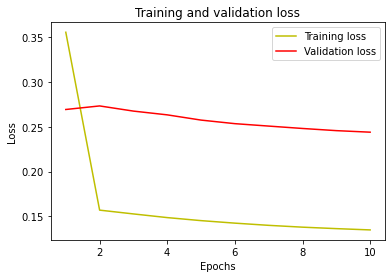

Configuration: timesteps=5, epochs=10, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3484490215778351
mae: 0.2894164025783539
rmse: 0.41371598839759827
Epoch 1/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6036 - mae: 0.5834 - rmse: 0.6011 - val_loss: 0.2977 - val_mae: 0.2123 - val_rmse: 0.2977
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 0.2200 - mae: 0.1974 - rmse: 0.2194 - val_loss: 0.2785 - val_mae: 0.2628 - val_rmse: 0.2785
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1521 - mae: 0.1296 - rmse: 0.1521 - val_loss: 0.2620 - val_mae: 0.2477 - val_rmse: 0.2620
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1482 - mae: 0.1258 - rmse: 0.1483 - val_loss: 0.2622 - val_mae: 0.2480 - val_rmse: 0.2622
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1470 - mae: 0.1251 - rmse: 0.1471 - val_loss: 0.2596 - val_mae: 0.2452 - val_rmse: 0.2596
Epoch 6/10
28

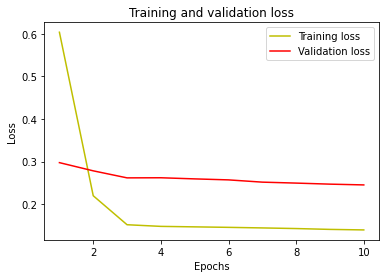

Configuration: timesteps=5, epochs=10, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.3522891104221344
mae: 0.29716959595680237
rmse: 0.4141341745853424
Epoch 1/20
39/39 [==============================] - 0s 7ms/step - loss: 0.2985 - mae: 0.2748 - rmse: 0.2980 - val_loss: 0.2732 - val_mae: 0.2556 - val_rmse: 0.2842
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1416 - mae: 0.1230 - rmse: 0.1418 - val_loss: 0.2523 - val_mae: 0.2348 - val_rmse: 0.2623
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1384 - mae: 0.1201 - rmse: 0.1386 - val_loss: 0.2500 - val_mae: 0.2319 - val_rmse: 0.2595
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1372 - mae: 0.1190 - rmse: 0.1374 - val_loss: 0.2491 - val_mae: 0.2309 - val_rmse: 0.2582
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1358 - mae: 0.1177 - rmse: 0.1360 - val_loss: 0.2496 - val_mae: 0.2316 - val_rmse: 0.2584
Epoch 6/20
39

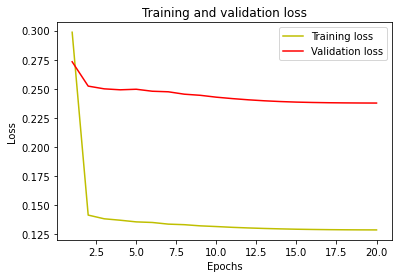

Configuration: timesteps=5, epochs=20, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3388456106185913
mae: 0.2803616523742676
rmse: 0.40063223242759705
Epoch 1/20
28/28 [==============================] - 0s 6ms/step - loss: 0.1995 - mae: 0.1749 - rmse: 0.1991 - val_loss: 0.2521 - val_mae: 0.2320 - val_rmse: 0.2521
Epoch 2/20
28/28 [==============================] - 0s 5ms/step - loss: 0.1352 - mae: 0.1158 - rmse: 0.1354 - val_loss: 0.2460 - val_mae: 0.2236 - val_rmse: 0.2460
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1343 - mae: 0.1152 - rmse: 0.1345 - val_loss: 0.2444 - val_mae: 0.2209 - val_rmse: 0.2444
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1337 - mae: 0.1145 - rmse: 0.1339 - val_loss: 0.2439 - val_mae: 0.2202 - val_rmse: 0.2439
Epoch 5/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1331 - mae: 0.1140 - rmse: 0.1334 - val_loss: 0.2437 - val_mae: 0.2201 - val_rmse: 0.2437
Epoch 6/20
28

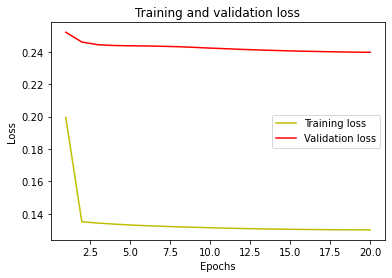

Configuration: timesteps=5, epochs=20, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.33989259600639343
mae: 0.2823292016983032
rmse: 0.40275105834007263
Epoch 1/10
39/39 [==============================] - 0s 9ms/step - loss: 0.3797 - mae: 0.3543 - rmse: 0.3775 - val_loss: 0.2914 - val_mae: 0.2707 - val_rmse: 0.2898
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.1539 - mae: 0.1312 - rmse: 0.1544 - val_loss: 0.2681 - val_mae: 0.2512 - val_rmse: 0.2682
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1470 - mae: 0.1260 - rmse: 0.1476 - val_loss: 0.2672 - val_mae: 0.2517 - val_rmse: 0.2679
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.1443 - mae: 0.1240 - rmse: 0.1450 - val_loss: 0.2678 - val_mae: 0.2534 - val_rmse: 0.2692
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1435 - mae: 0.1236 - rmse: 0.1442 - val_loss: 0.2626 - val_mae: 0.2486 - val_rmse: 0.2644
Epoch 6/10
3

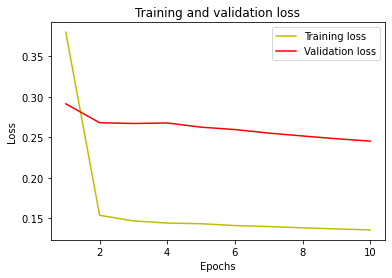

Configuration: timesteps=7, epochs=10, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3626091778278351
mae: 0.3070858120918274
rmse: 0.43784305453300476
Epoch 1/10
28/28 [==============================] - 0s 6ms/step - loss: 0.3843 - mae: 0.3590 - rmse: 0.3797 - val_loss: 0.2598 - val_mae: 0.2352 - val_rmse: 0.2598
Epoch 2/10
28/28 [==============================] - 0s 6ms/step - loss: 0.1553 - mae: 0.1304 - rmse: 0.1554 - val_loss: 0.2495 - val_mae: 0.2211 - val_rmse: 0.2495
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1476 - mae: 0.1241 - rmse: 0.1479 - val_loss: 0.2514 - val_mae: 0.2259 - val_rmse: 0.2514
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1462 - mae: 0.1234 - rmse: 0.1466 - val_loss: 0.2498 - val_mae: 0.2247 - val_rmse: 0.2498
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1449 - mae: 0.1226 - rmse: 0.1452 - val_loss: 0.2442 - val_mae: 0.2172 - val_rmse: 0.2442
Epoch 6/10
28

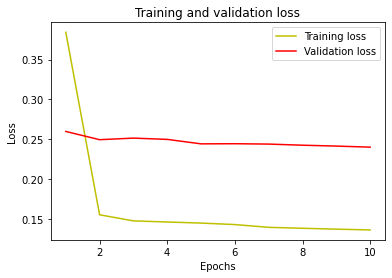

Configuration: timesteps=7, epochs=10, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.34920358657836914
mae: 0.2979178726673126
rmse: 0.42215514183044434
Epoch 1/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4274 - mae: 0.4024 - rmse: 0.4239 - val_loss: 0.2790 - val_mae: 0.2545 - val_rmse: 0.2741
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1538 - mae: 0.1308 - rmse: 0.1542 - val_loss: 0.2586 - val_mae: 0.2339 - val_rmse: 0.2571
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1461 - mae: 0.1249 - rmse: 0.1467 - val_loss: 0.2571 - val_mae: 0.2345 - val_rmse: 0.2557
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1438 - mae: 0.1232 - rmse: 0.1443 - val_loss: 0.2541 - val_mae: 0.2326 - val_rmse: 0.2532
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1414 - mae: 0.1214 - rmse: 0.1419 - val_loss: 0.2497 - val_mae: 0.2281 - val_rmse: 0.2495
Epoch 6/20
3

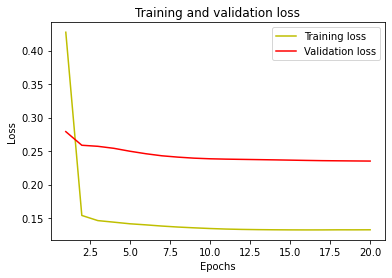

Configuration: timesteps=7, epochs=20, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.342642217874527
mae: 0.28435662388801575
rmse: 0.4126920700073242
Epoch 1/20
28/28 [==============================] - 0s 6ms/step - loss: 0.5472 - mae: 0.5251 - rmse: 0.5411 - val_loss: 0.2531 - val_mae: 0.1940 - val_rmse: 0.2531
Epoch 2/20
28/28 [==============================] - 0s 4ms/step - loss: 0.1944 - mae: 0.1618 - rmse: 0.1941 - val_loss: 0.2741 - val_mae: 0.2546 - val_rmse: 0.2741
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1564 - mae: 0.1311 - rmse: 0.1568 - val_loss: 0.2719 - val_mae: 0.2537 - val_rmse: 0.2719
Epoch 4/20
28/28 [==============================] - 0s 4ms/step - loss: 0.1528 - mae: 0.1290 - rmse: 0.1530 - val_loss: 0.2619 - val_mae: 0.2444 - val_rmse: 0.2619
Epoch 5/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1507 - mae: 0.1273 - rmse: 0.1510 - val_loss: 0.2577 - val_mae: 0.2402 - val_rmse: 0.2577
Epoch 6/20
28/

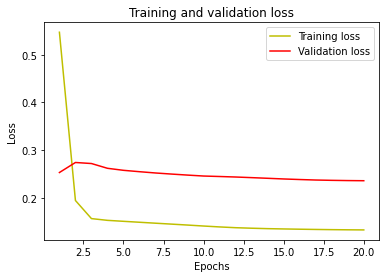

Configuration: timesteps=7, epochs=20, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.3527016043663025
mae: 0.2904093563556671
rmse: 0.4341677725315094


In [7]:
scores = grid_search(df_uni, configs, features)

## Forecasting

Import methods

In [8]:
from Data.data_processing import data_denormalization
from models import call_model, forecast_single, forecast_multi, plot_forecast

Get trained model from a config

Epoch 1/20
28/28 [==============================] - 0s 6ms/step - loss: 0.4603 - mae: 0.4363 - rmse: 0.4546 - val_loss: 0.2411 - val_mae: 0.2020 - val_rmse: 0.2411
Epoch 2/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1561 - mae: 0.1300 - rmse: 0.1564 - val_loss: 0.2475 - val_mae: 0.2228 - val_rmse: 0.2475
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1467 - mae: 0.1237 - rmse: 0.1472 - val_loss: 0.2476 - val_mae: 0.2259 - val_rmse: 0.2476
Epoch 4/20
28/28 [==============================] - 0s 3ms/step - loss: 0.1439 - mae: 0.1224 - rmse: 0.1444 - val_loss: 0.2444 - val_mae: 0.2220 - val_rmse: 0.2444
Epoch 5/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1426 - mae: 0.1216 - rmse: 0.1431 - val_loss: 0.2419 - val_mae: 0.2185 - val_rmse: 0.2419
Epoch 6/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1412 - mae: 0.1206 - rmse: 0.1417 - val_loss: 0.2400 - val_mae: 0.2152 - val_rmse: 0.2400
Epoch 7/20
28/28

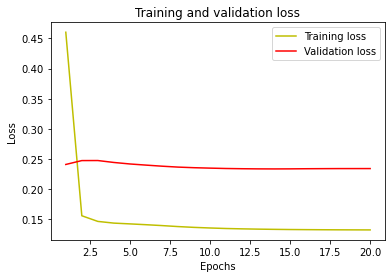

Configuration: timesteps=7, epochs=20, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.34546253085136414
mae: 0.279123991727829
rmse: 0.41615191102027893


In [9]:
my_config = (7, 20, 7, 16, 5, 2)
model = call_model(df_uni, my_config, features)[0]

Single-step forecast

In [10]:
forecast_single(model, df_uni, my_config[0], scaler)

229.60567

Recursive multi-step forecast

In [11]:
multisteps = 5 # number of days to forecast (we will forecast the next 5 days)

forecasts = forecast_multi(model, df_uni, my_config[0], multisteps, scaler)
forecasts

[229.60567, 284.47437, 279.8555, 214.53072, 245.85753]

Plot multi-step forecast

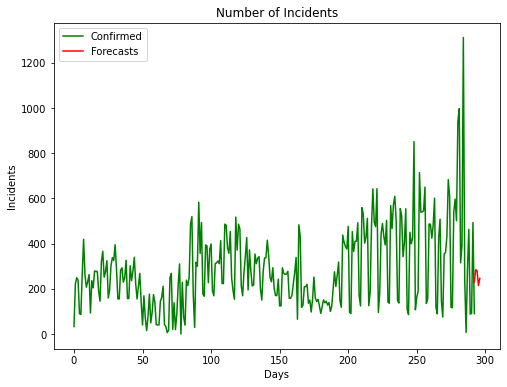

In [12]:
from models import plot_forecast

values = data_denormalization(method, df_uni, scaler)
plot_forecast(values, forecasts)